In [31]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.graphics.api import influence_plot

In [2]:
df=pd.read_csv('Salary_Data.csv')
df.head()

<IPython.core.display.Javascript object>

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.shape

(30, 2)

In [5]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<IPython.core.display.Javascript object>

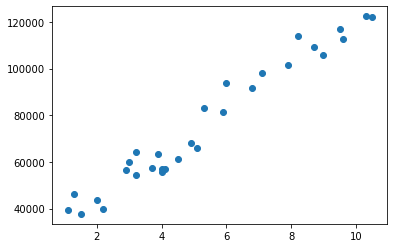

In [6]:
plt.scatter(df.YearsExperience,df.Salary)

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

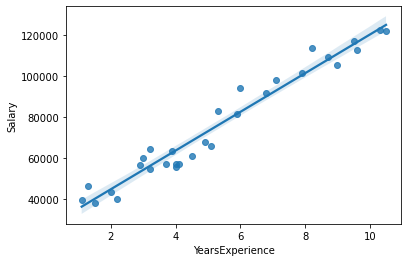

In [7]:
sns.regplot(df.YearsExperience,df.Salary)

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

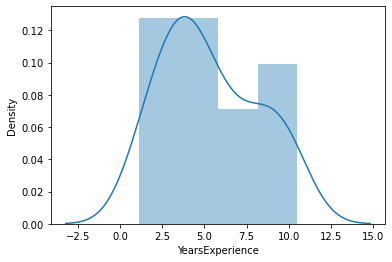

In [8]:
sns.distplot(df['YearsExperience'])


<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

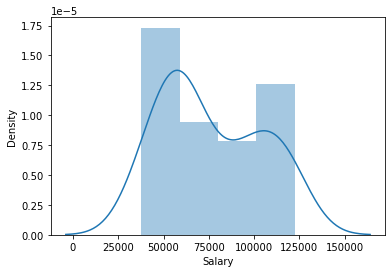

In [9]:
sns.distplot(df['Salary'])

In [10]:
x=df['YearsExperience'].values.reshape(30,1)
y=df['Salary'].values.reshape(30,1)
lr=LinearRegression()
model=lr.fit(x,y)

In [11]:
model.coef_

array([[9449.96232146]])

In [12]:
model.intercept_

array([25792.20019867])

In [13]:
lr_pred_salary=model.predict(x)

In [14]:
lr_pred_salary

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [15]:
r2_score(y,lr_pred_salary)

0.9569566641435086

In [16]:
df['Predicted_salary']=lr_pred_salary

In [17]:
df

,YearsExperience,Salary,Predicted_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

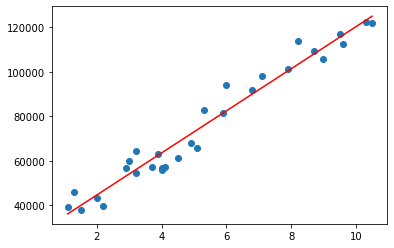

In [18]:
plt.plot(x,lr_pred_salary,color='red')
plt.scatter(x,y)

In [19]:
newdata=pd.DataFrame([1,5,3,9,12,14,20],columns=['YearsExperience'])

<IPython.core.display.Javascript object>

In [20]:
newdata

,YearsExperience
0,1
1,5
2,3
3,9
4,12
5,14
6,20


In [21]:
model.predict(newdata)

C:\Users\OMKAR\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 35242.16252012],
       [ 73042.01180594],
       [ 54142.08716303],
       [110841.86109176],
       [139191.74805613],
       [158091.67269904],
       [214791.44662777]])

In [22]:
model1=smf.ols('Salary~YearsExperience',data=df).fit()
model1.rsquared


0.9569566641435086

In [23]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [24]:
model1.predict(newdata)

0     35242.162520
1     73042.011806
2     54142.087163
3    110841.861092
4    139191.748056
5    158091.672699
6    214791.446628
dtype: float64

In [25]:
model1.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [26]:
model1.resid.mean()

-1.5036979069312415e-11

<IPython.core.display.Javascript object>

C:\Users\OMKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

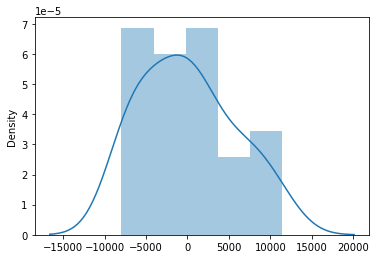

In [27]:
sns.distplot(model1.resid)

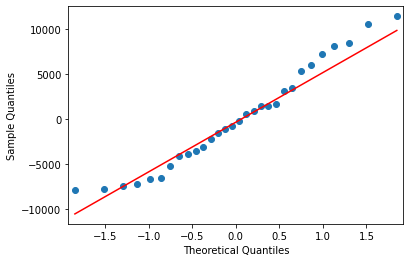

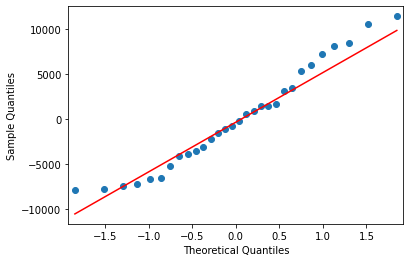

In [41]:
import statsmodels.api as sm
sm.qqplot(model1.resid,line='q')

In [28]:
df['residuals']=model1.resid

In [29]:
df

,YearsExperience,Salary,Predicted_salary,residuals
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306
5,2.9,56642.0,53197.090931,3444.909069
6,3.0,60150.0,54142.087163,6007.912837
7,3.2,54445.0,56032.079627,-1587.079627
8,3.2,64445.0,56032.079627,8412.920373
9,3.7,57189.0,60757.060788,-3568.060788


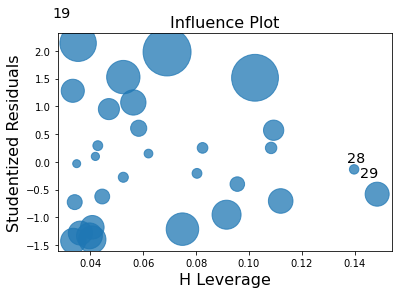

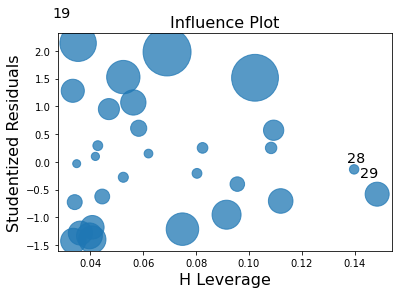

In [32]:
influence_plot(model1)

In [33]:
leverage_cutoff=3*(2+1)/30
leverage_cutoff

0.3

In [35]:
model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance
c

array([2.04861819e-02, 1.25145650e-01, 8.72116606e-03, 1.93092472e-03,
       5.84154210e-02, 1.16363588e-02, 3.40167284e-02, 2.19613539e-03,
       6.17099555e-02, 9.25533214e-03, 2.21968428e-04, 4.01548032e-02,
       2.90705910e-02, 3.56540638e-02, 3.01682374e-02, 9.42447229e-03,
       3.39239364e-02, 2.76816818e-02, 1.88727425e-05, 7.43028573e-02,
       1.98157219e-03, 2.24043716e-02, 7.68659258e-04, 1.31754523e-01,
       2.96376458e-03, 4.57869868e-02, 4.00003185e-03, 3.18614898e-02,
       1.52660429e-03, 3.02325174e-02])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<StemContainer object of 3 artists>

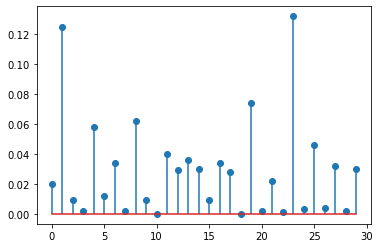

In [39]:
plt.stem(np.arange(len(df)),np.round(c,3))

In [ ]:
# rsquared value for fitted model is very good
# residuals values are normally distribute with mean = 0
# all point lie within the leverge_cutoff in influence plot
# cooks distance for all points is also with limit